In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib .pyplot as plt #importing info into graphs
%matplotlib inline
import seaborn as sns #for pretty/more detailed graphs
import scipy.stats as stats
pd.set_option('display.max_columns',None) #gives space so i can view all of the collumns 

# Importing data

In [2]:
file1= pd.read_csv('/Users/hpb/PycharmProjects/Ironhack/housing_regression_model/original_data.csv')

In [3]:
column_names=file1.columns 
data=pd.DataFrame(columns=column_names) 
house_price_df=pd.concat([data,file1],axis=0)

# Cleaning data

In [4]:
house_price_df.dtypes

id                object
date              object
bedrooms          object
bathrooms        float64
sqft_living       object
sqft_lot          object
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above        object
sqft_basement     object
yr_built          object
yr_renovated      object
zipcode           object
lat              float64
long             float64
sqft_living15     object
sqft_lot15        object
price             object
dtype: object

In [5]:
house_price_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [6]:
house_price_df[["bedrooms","sqft_living","sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement", "zipcode", "sqft_living15", "sqft_lot15", "price", "waterfront", "view", "yr_built", "yr_renovated"]] = house_price_df[["bedrooms","sqft_living","sqft_lot", "floors", "condition", "grade", "sqft_above", "sqft_basement", "zipcode", "sqft_living15", "sqft_lot15", "price", "waterfront", "view", "yr_built", "yr_renovated"]].apply(pd.to_numeric)

In [7]:
house_price_df['date']=pd.to_datetime(house_price_df['date'], errors='coerce') #Change object to Datetime format.

In [8]:
house_price_df.describe() #values that look weird bedrooms, bathrooms, floors, condition, sqft_basement

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [9]:
house_price_df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [10]:
house_price_df['floors']=house_price_df['floors'].apply(np.ceil) #round up count of floors

In [11]:
house_price_df[["floors"]] = house_price_df[["floors"]].astype(int) #convert straight to numeric

In [12]:
house_price_df.dtypes

id                       object
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [13]:
house_price_df.shape

(21597, 21)

In [14]:
round(house_price_df.isna().sum()/len(house_price_df),4)*100 #check for nulls in all values. Apparently 0.

id               0.0
date             0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
price            0.0
dtype: float64

In [15]:
house_price_df.isnull().values.any() #check for NaN values

False

In [16]:
house_price_df.to_csv('/Users/hpb/PycharmProjects/Ironhack/housing_regression_model/cleaned_data.csv', index = False) #export as csv

# Notes

* Intial theories - Location, size and quality are important factors to determine house prices. 
* Plan of action - Create extra columns for zipcode, size and grade of housing.
* Next step - Explore data further (in python & tableau) to figure out how to do this.


In [22]:
numericals = house_price_df.select_dtypes(np.number)
numericals

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [23]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [24]:
continuous = list(numericals.drop(columns = discrete).columns)

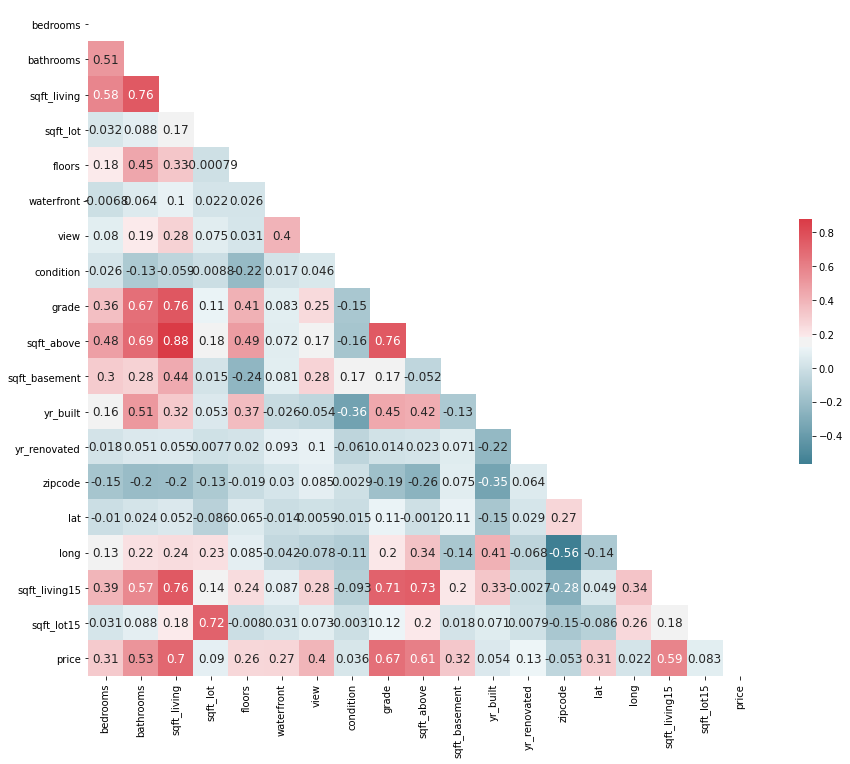

In [25]:
mask = np.zeros_like(house_price_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))                   

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  
sns.heatmap(data      = house_price_df.corr(), 
            cmap      = cmap, 
            mask      = mask,
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = True, 
            annot_kws = {'fontsize': 12},
            ax        = ax
            
           )

In [26]:
# Checking collinearity 
numscorr = numericals.corr(method = 'spearman') # variable of the corr matrix using spearman
numscorr['price'] # Correlation vs 'price'.

bedrooms         0.344245
bathrooms        0.497298
sqft_living      0.643993
sqft_lot         0.075071
floors           0.320664
waterfront       0.115119
view             0.293906
condition        0.017995
grade            0.658152
sqft_above       0.541563
sqft_basement    0.251491
yr_built         0.102058
yr_renovated     0.101830
zipcode         -0.009084
lat              0.456126
long             0.064058
sqft_living15    0.572263
sqft_lot15       0.063076
price            1.000000
Name: price, dtype: float64

# Notes 

* Plan of action - use all features that fit my assumption without adding "too many" features. Use different models and narrow down features to compare models.
* Sqft_living15, sqft_above, sqft_living, bedrooms, bathrooms, grade - good features to use for our model.
* Also want to use zipcode, latitude and longitude to test initial theory about location.

# Exploring/data wrangling

In [28]:
#Exploring continuous data
continuous_df=house_price_df[continuous]

In [29]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()

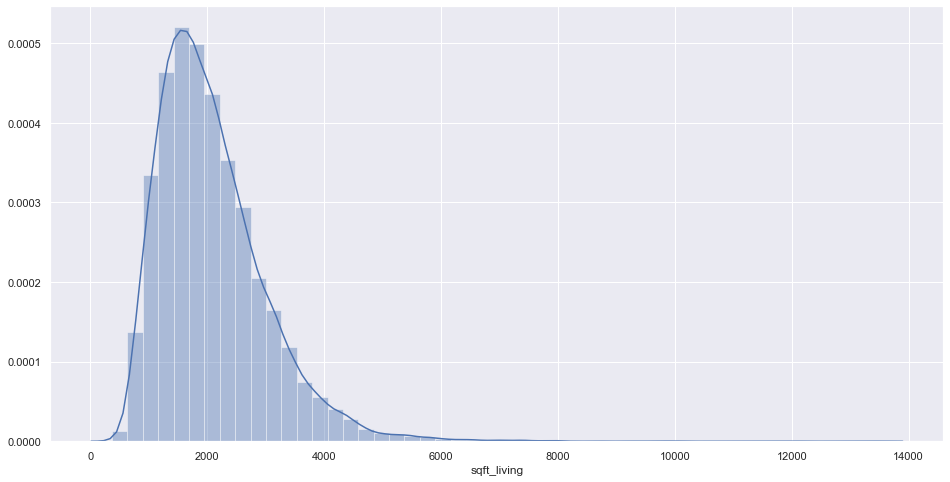

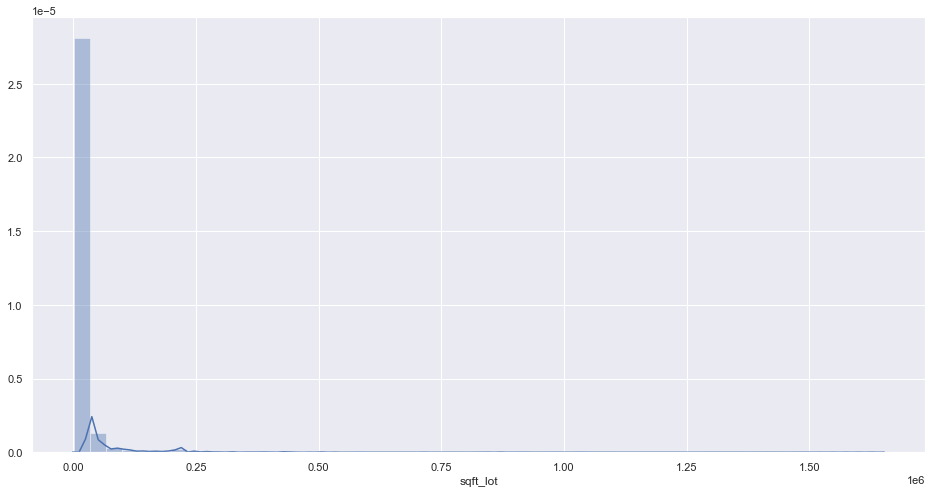

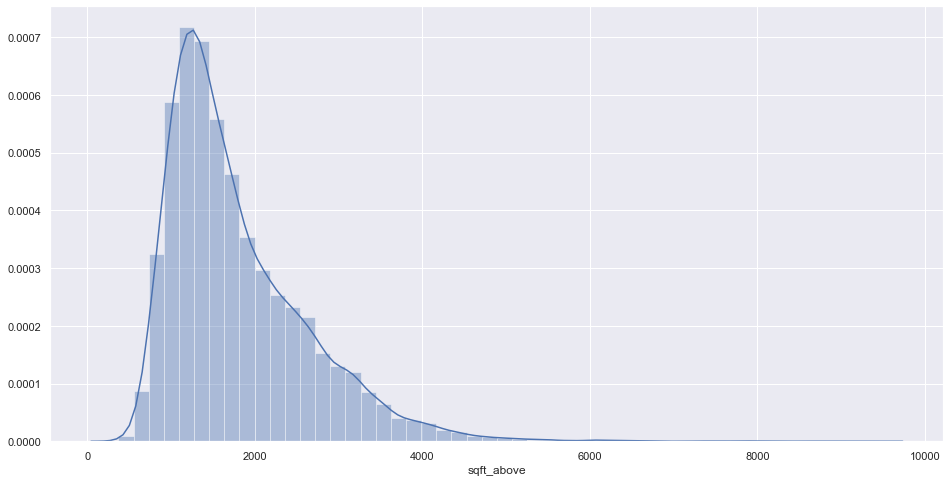

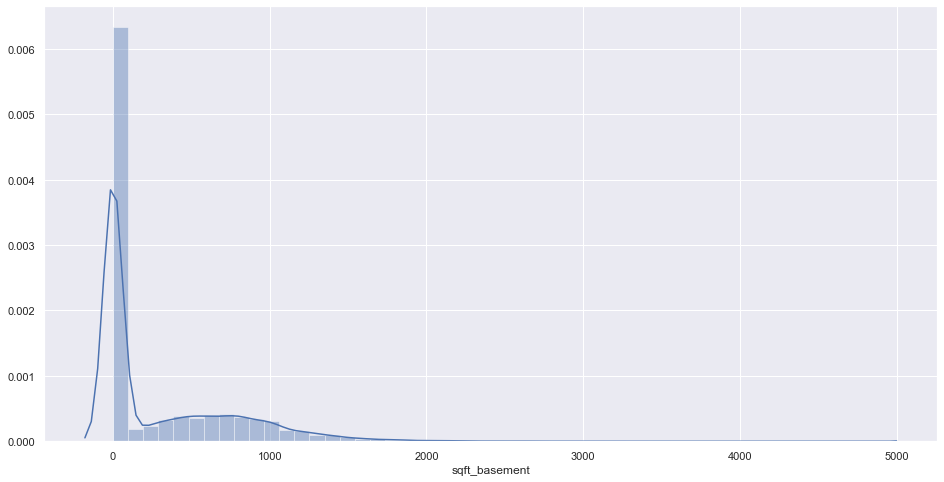

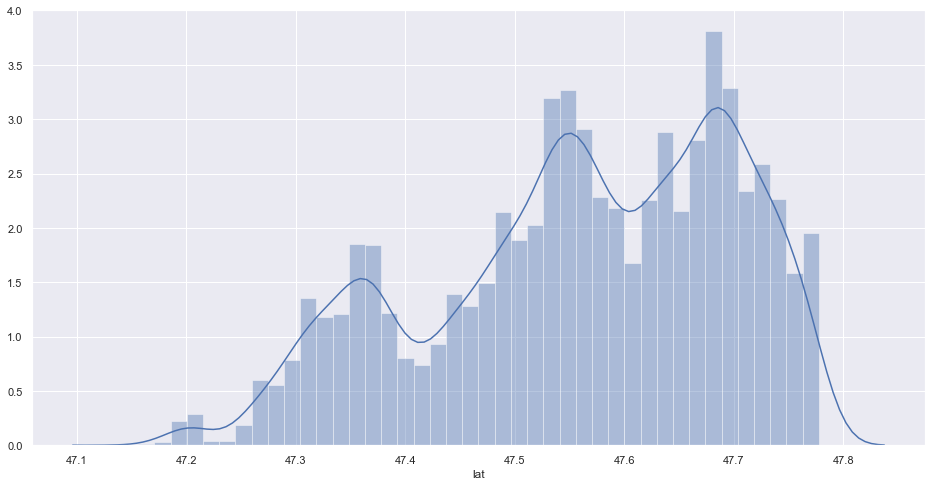

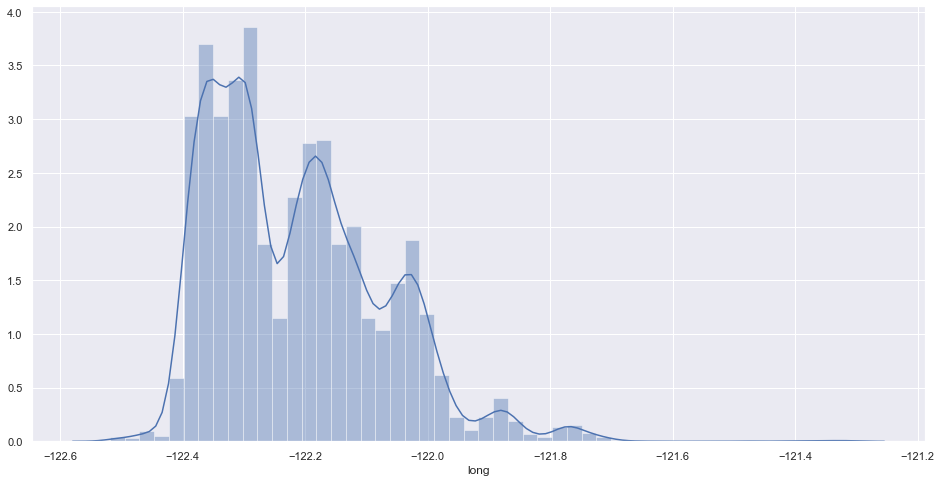

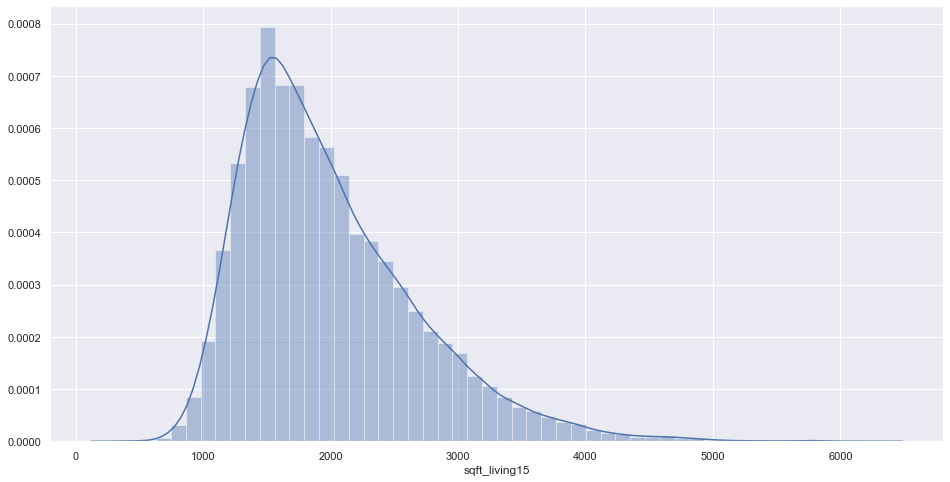

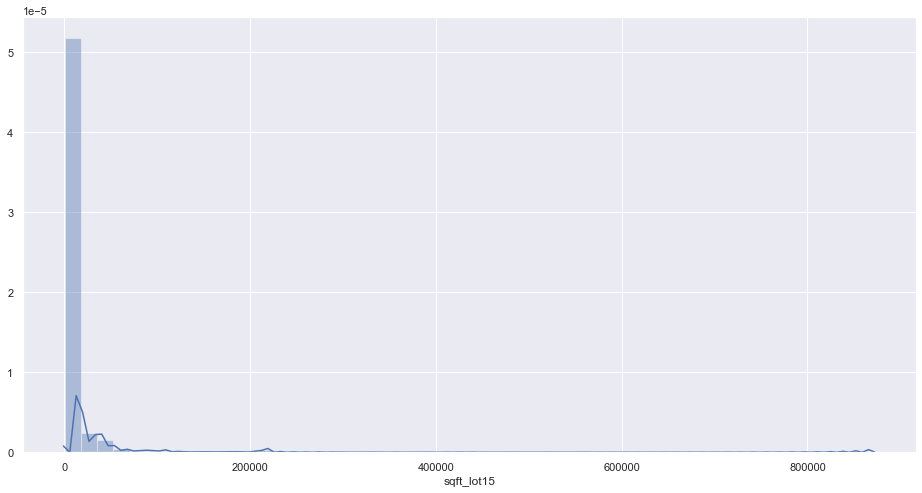

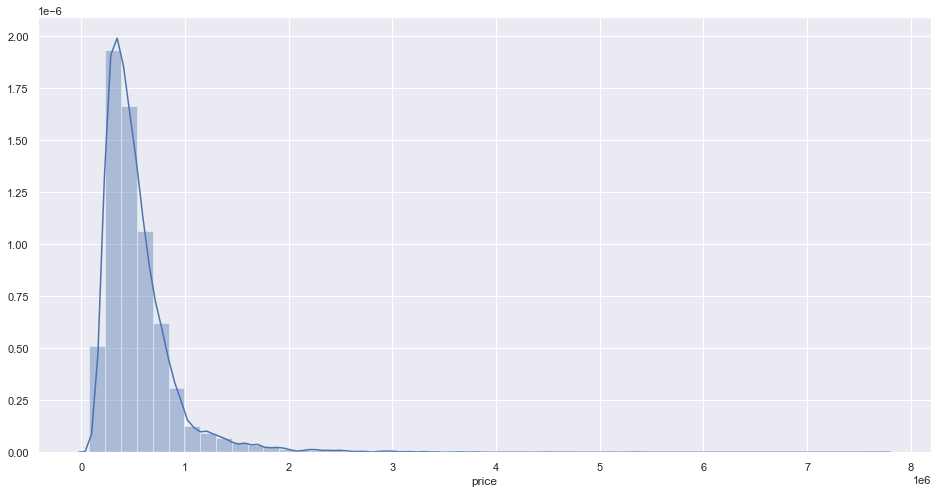

In [30]:
df_hist(continuous_df)

In [31]:
# Visualisation - discrete data
discrete_df=house_price_df[discrete]

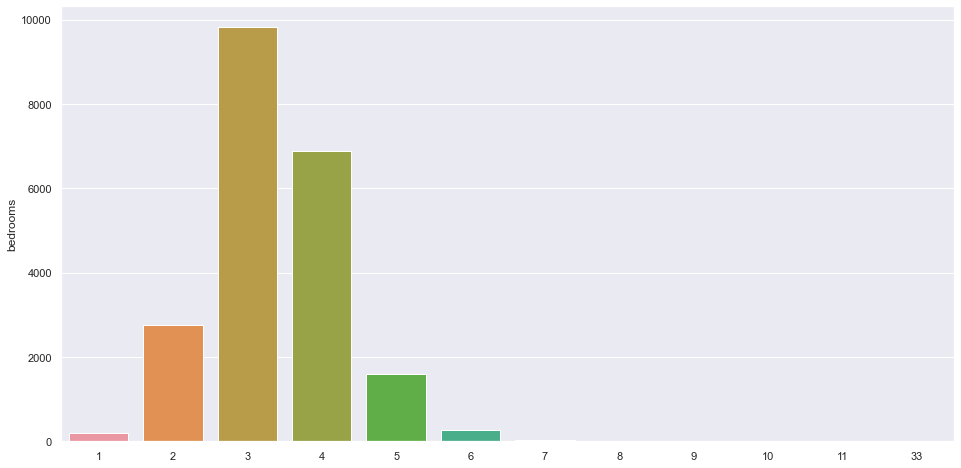

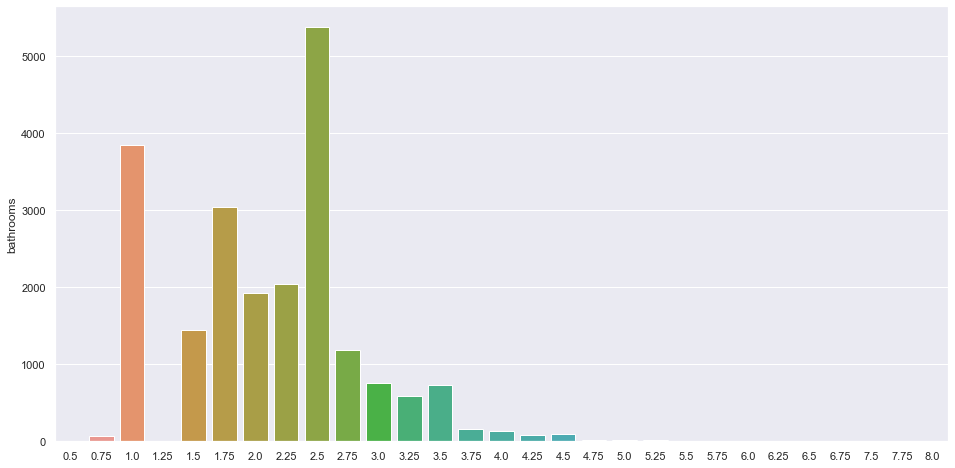

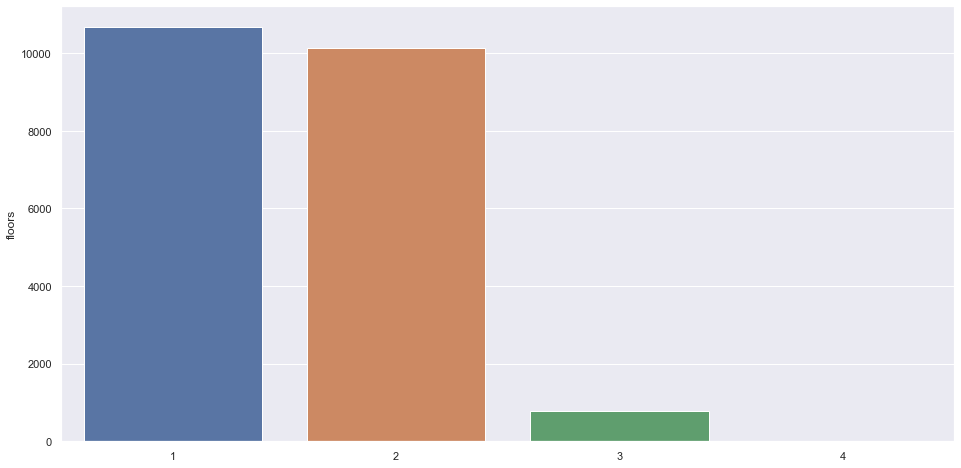

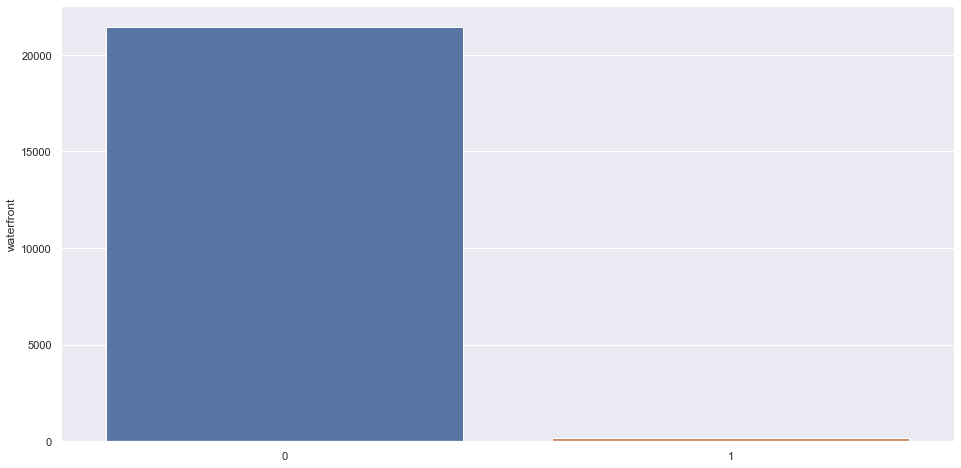

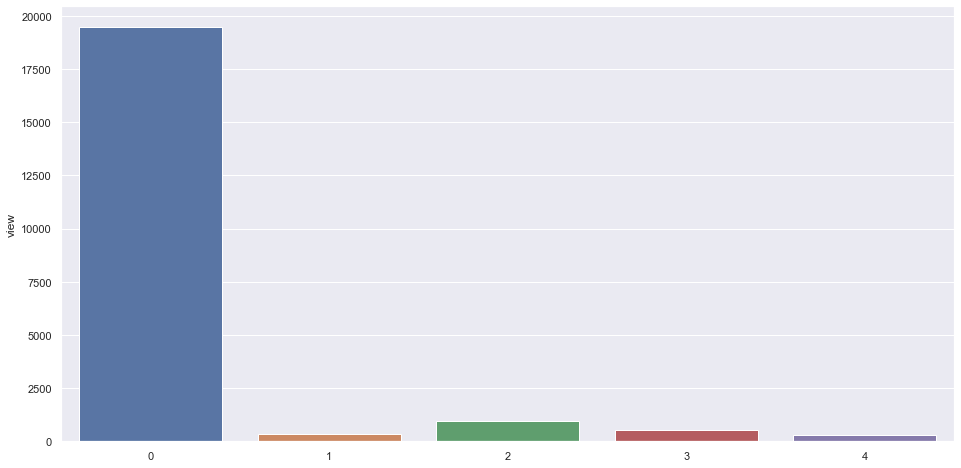

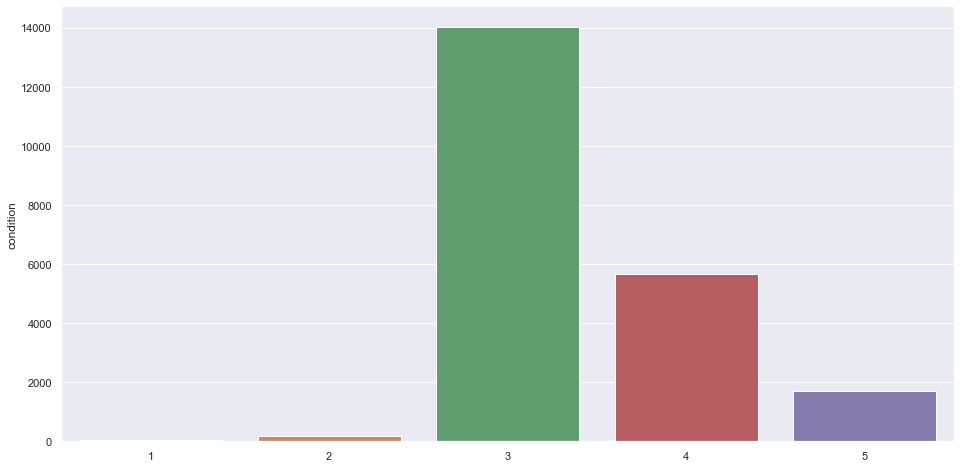

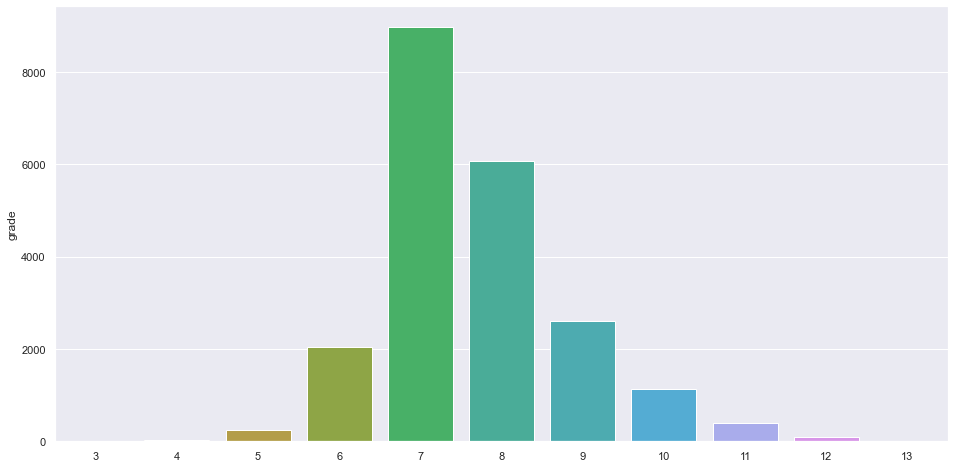

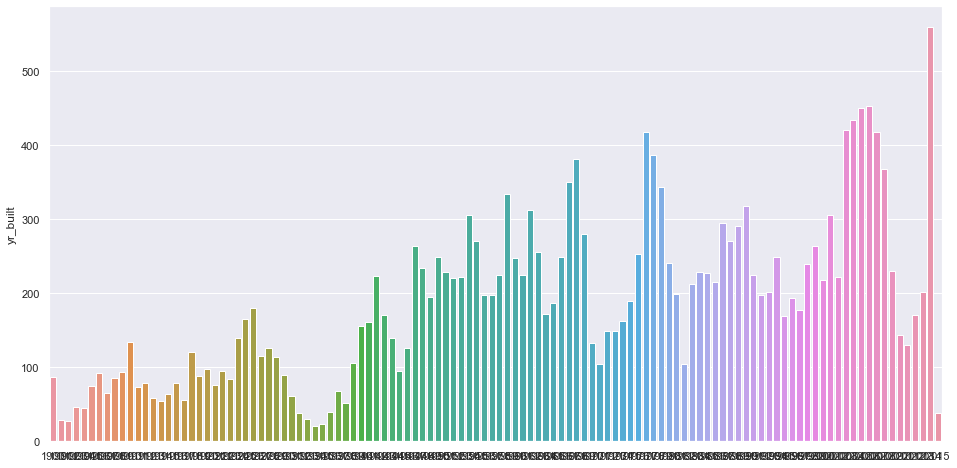

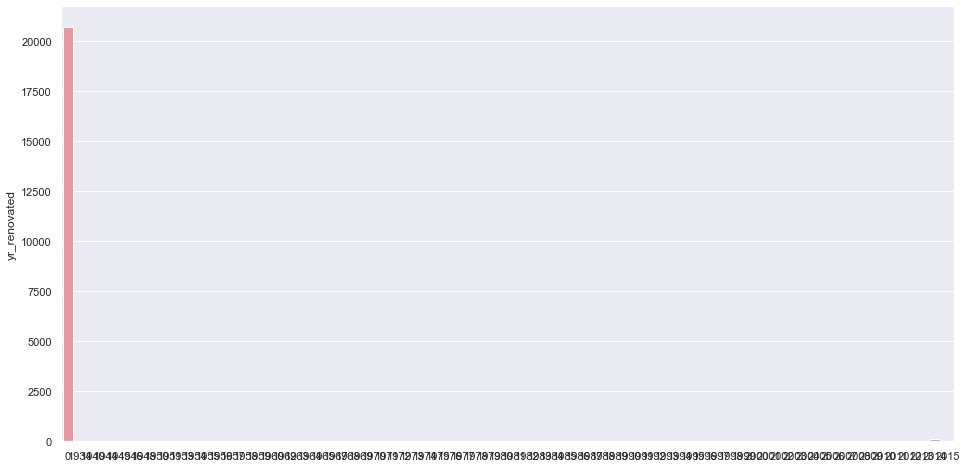

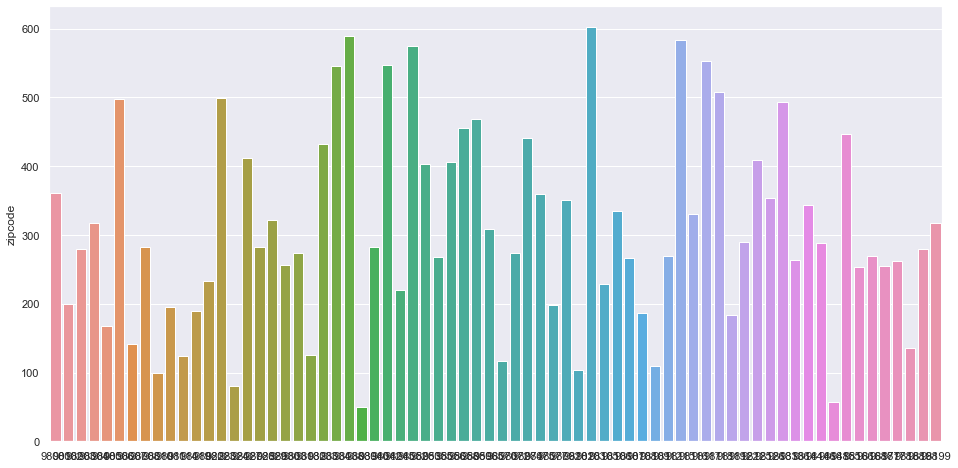

In [32]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

df_bar(discrete_df)

# Notes/Feature selection

* Dealing with grade, number of bathrooms & bedrooms - binning them in less variables to make them easier to digest. 
* Dealing with zipcode column - separated by 'area'. Visualisations for this can be seen on Tableau document. 

In [33]:
house_price_df['zipcode'].value_counts() 

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [34]:
def grade_cat(x):
    if x <= 7:
        return 1
    elif x > 8 and x <= 10:
        return 2
    else:
        return 3

In [35]:
house_price_df['grade'] = list(map(grade_cat, house_price_df['grade']))

In [36]:
house_price_df['grade'].value_counts()

1    11282
3     6566
2     3749
Name: grade, dtype: int64

In [37]:
house_price_df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1,0,0,3,1,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2,0,0,3,1,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1,0,0,3,1,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1,0,0,5,1,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1,0,0,3,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3,0,0,3,3,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2,0,0,3,3,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2,0,0,3,1,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2,0,0,3,3,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [38]:
#kiez separated by district
import math

def first_three(d):                
     return (d // 10 ** (int(math.log(d, 10))- 2))

house_price_df['kiez'] = house_price_df.zipcode.apply(first_three)

In [39]:
house_price_df['kiez'].value_counts()

980    12624
981     8973
Name: kiez, dtype: int64

In [40]:
def bath_cat(g):
    if g <= 3:
        return "average"
    else:
        return "over"
    
house_price_df['bathrooms'] = list(map(bath_cat, house_price_df['bathrooms']))

In [41]:
house_price_df['bathrooms'].value_counts()

average    19720
over        1877
Name: bathrooms, dtype: int64

In [44]:
def bed_cat(s):
    if s <= 3:
        return "small"
    elif s >= 4 and s <= 5:
        return "medium"
    else:
        return "large"
house_price_df['bedrooms'] = list(map(bed_cat, house_price_df['bedrooms']))

In [45]:
house_price_df['bedrooms'].value_counts()

small     12780
medium     8483
large       334
Name: bedrooms, dtype: int64

# Notes

* Encode data with one hot encoder to prepare it for model.

# Encoding data

In [46]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [47]:
import category_encoders as ce

In [48]:
data=house_price_df
encoder=ce.OneHotEncoder(cols=['grade', 'bathrooms', 'bedrooms','kiez'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [49]:
data_encoded = encoder.fit_transform(data)
data_encoded

,id,date,bedrooms_small,bedrooms_medium,bedrooms_large,bathrooms_average,bathrooms_over,sqft_living,sqft_lot,floors,waterfront,view,condition,grade_1.0,grade_3.0,grade_2.0,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,kiez_981.0,kiez_980.0
0,7129300520,2014-10-13,1.0,0.0,0.0,1.0,0.0,1180,5650,1,0,0,3,1.0,0.0,0.0,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,1.0,0.0
1,6414100192,2014-12-09,1.0,0.0,0.0,1.0,0.0,2570,7242,2,0,0,3,1.0,0.0,0.0,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,1.0,0.0
2,5631500400,2015-02-25,1.0,0.0,0.0,1.0,0.0,770,10000,1,0,0,3,1.0,0.0,0.0,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,0.0,1.0
3,2487200875,2014-12-09,0.0,1.0,0.0,1.0,0.0,1960,5000,1,0,0,5,1.0,0.0,0.0,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,1.0,0.0
4,1954400510,2015-02-18,1.0,0.0,0.0,1.0,0.0,1680,8080,1,0,0,3,0.0,1.0,0.0,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,1.0,0.0,0.0,1.0,0.0,1530,1131,3,0,0,3,0.0,1.0,0.0,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,1.0,0.0
21593,6600060120,2015-02-23,0.0,1.0,0.0,1.0,0.0,2310,5813,2,0,0,3,0.0,1.0,0.0,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,1.0,0.0
21594,1523300141,2014-06-23,1.0,0.0,0.0,1.0,0.0,1020,1350,2,0,0,3,1.0,0.0,0.0,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,1.0,0.0
21595,291310100,2015-01-16,1.0,0.0,0.0,1.0,0.0,1600,2388,2,0,0,3,0.0,1.0,0.0,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000,0.0,1.0


# Model of all features - OLS

In [50]:
final_df= data_encoded.drop(columns="id")
final_df= final_df.drop(columns="date")
final_df= final_df.drop(columns="yr_built")
final_df= final_df.drop(columns="yr_renovated")
final_df= final_df.drop(columns="zipcode")
final_df=final_df.drop(columns="floors") 
final_df=final_df.drop(columns="condition") 
final_df= final_df.drop(columns="waterfront") 

In [51]:
final_df

,bedrooms_small,bedrooms_medium,bedrooms_large,bathrooms_average,bathrooms_over,sqft_living,sqft_lot,view,grade_1.0,grade_3.0,grade_2.0,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price,kiez_981.0,kiez_980.0
0,1.0,0.0,0.0,1.0,0.0,1180,5650,0,1.0,0.0,0.0,1180,0,47.5112,-122.257,1340,5650,221900,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,2570,7242,0,1.0,0.0,0.0,2170,400,47.7210,-122.319,1690,7639,538000,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,770,10000,0,1.0,0.0,0.0,770,0,47.7379,-122.233,2720,8062,180000,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1960,5000,0,1.0,0.0,0.0,1050,910,47.5208,-122.393,1360,5000,604000,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1680,8080,0,0.0,1.0,0.0,1680,0,47.6168,-122.045,1800,7503,510000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,0.0,0.0,1.0,0.0,1530,1131,0,0.0,1.0,0.0,1530,0,47.6993,-122.346,1530,1509,360000,1.0,0.0
21593,0.0,1.0,0.0,1.0,0.0,2310,5813,0,0.0,1.0,0.0,2310,0,47.5107,-122.362,1830,7200,400000,1.0,0.0
21594,1.0,0.0,0.0,1.0,0.0,1020,1350,0,1.0,0.0,0.0,1020,0,47.5944,-122.299,1020,2007,402101,1.0,0.0
21595,1.0,0.0,0.0,1.0,0.0,1600,2388,0,0.0,1.0,0.0,1600,0,47.5345,-122.069,1410,1287,400000,0.0,1.0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "price"),
                                                    final_df.price, test_size = 0.2, random_state=1)

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_train_wi=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train_wi).fit()  



print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2140.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:07:55   Log-Likelihood:            -2.3731e+05
No. Observations:               17277   AIC:                         4.747e+05
Df Residuals:                   17262   BIC:                         4.748e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -2.44e+07   8.87e+0

In [55]:
#try with linear regression
from sklearn.linear_model import LinearRegression as LinReg 
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.metrics import mean_absolute_error as mae

In [56]:
#model metrics
linreg=LinReg()    
linreg.fit(X_train, y_train)   
y_pred_linreg=linreg.predict(X_test) 
r2_score(y_test,y_pred_linreg)
train_mse=mse(linreg.predict(X_train), y_train)
test_mse=mse(linreg.predict(X_test), y_test)
train_mae=mae(linreg.predict(X_train), y_train)
test_mae=mae(linreg.predict(X_test), y_test)

print ('train R2: {} -- test R2: {}'.format(linreg.score(X_train, y_train),
                                            linreg.score(X_test, y_test)))
print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))
print ('train MAE: {} -- test MAE: {}'.format(train_mae, test_mae))
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train R2: 0.6344408955003162 -- test R2: 0.6553728294043342
train MSE: 49907928709.55464 -- test MSE: 44334442649.517334
train MAE: 139893.99502772331 -- test MAE: 133931.91975977883
train RMSE: 223400.82522129288 -- test RMSE: 210557.45688414204


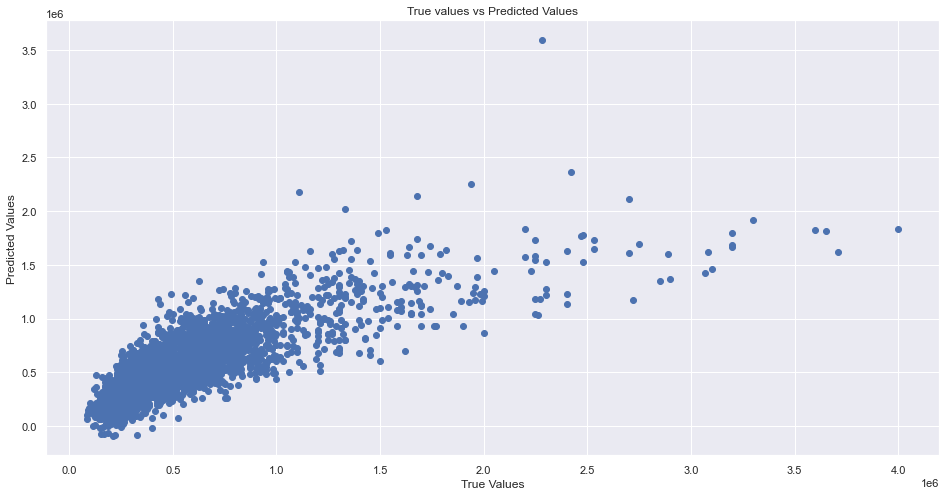

In [57]:
plt.scatter(x=y_test, y=y_pred_linreg)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()


# Try with Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [60]:
tree_predictions = rf.predict(X_test)

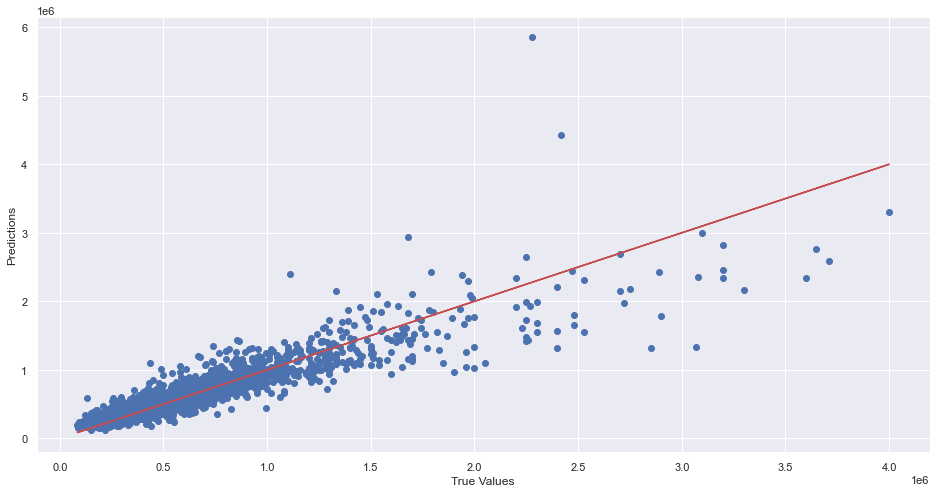

In [61]:
plt.scatter(y_test, tree_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(y_test,y_test,'r')

In [62]:
MAE = mae(y_test,tree_predictions)
MSE = mse(y_test,tree_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,tree_predictions)

print("the mean absolut error of the model in the test set is: %6.2f" % (MAE))
print("the mean squared error of the model in the test set is: %6.2f" % (MSE))
print("the root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("the R2 of the model in the test set is: %4.5f" % (R2))

the mean absolut error of the model in the test set is: 73618.29
the mean squared error of the model in the test set is: 21593202794.73
the root mean squared error of the model in the test set is: 146946.26
the R2 of the model in the test set is: 0.83215


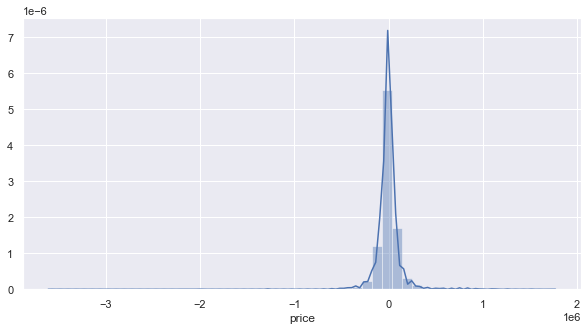

In [63]:
# Plotting of residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- tree_predictions)
sns.distplot(residuals)

# Removing excess elements

In [64]:
#removing sqft_living & lot - outdated version.
#remove bathrooms - same as bedrooms but higher multicollinearity.
final_df= final_df.drop(columns="sqft_living") 
final_df= final_df.drop(columns="sqft_lot")
final_df=final_df.drop(columns="bathrooms_average")
final_df=final_df.drop(columns="bathrooms_over")

In [65]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "price"),
                                                    final_df.price, test_size = 0.2, random_state=1)

In [66]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [67]:
tree_predictions = rf.predict(X_test)

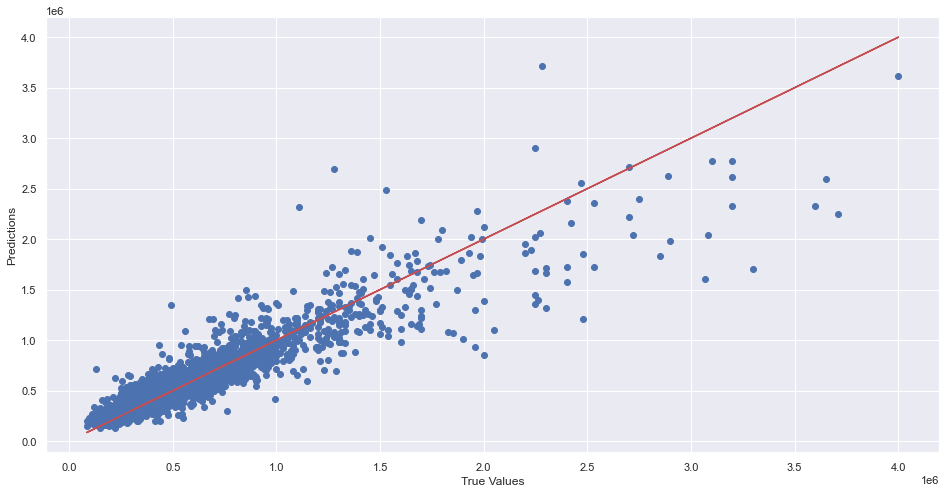

In [68]:
plt.scatter(y_test, tree_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(y_test,y_test,'r')

In [69]:
MAE = mae(y_test,tree_predictions)
MSE = mse(y_test,tree_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,tree_predictions)

print("the mean absolut error of the model in the test set is: %6.2f" % (MAE))
print("the mean squared error of the model in the test set is: %6.2f" % (MSE))
print("the root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("the R2 of the model in the test set is: %4.5f" % (R2))

the mean absolut error of the model in the test set is: 73439.34
the mean squared error of the model in the test set is: 18814381043.63
the root mean squared error of the model in the test set is: 137165.52
the R2 of the model in the test set is: 0.85375


In [70]:
#Exporting model data to csv
final_df.to_csv('/Users/hpb/PycharmProjects/Ironhack/housing_regression_model/Model_data_rf.csv')